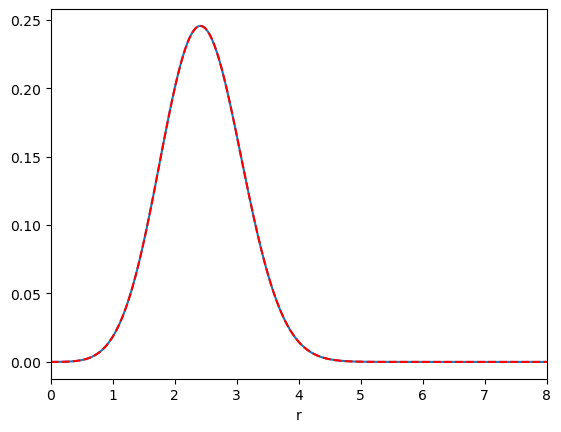

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

N = 50                                                   # Truncation ordem

L0 = 2                                              # Map parameter 

col = np.cos(np.arange(2*N + 4)*math.pi /(2*N + 3))      # collocation points (Verificado)

colr = col[1:N+2]

r = L0 * colr/(np.sqrt(1-colr**2))                       # physical domain (Verificado)             

#out_r = open('r_30_L02.txt', 'a')
#out_r.write(' ' +' '.join(str('%.18f'%n) for n in r)+'\n')
#out_r.close()


# Base Matrix (Tchebyshev Polinomials): 

SB = np.zeros([N+3,N+1])
rSB = np.zeros([N+3,N+1])
rrSB = np.zeros([N+3,N+1])


for i in range(N+1+1+1):
  SB[i,] = np.sin((2*i+1)*np.arctan(L0/r))                                                  

for i in range(N+1+1+1):
  rSB[i,] = -np.cos((2*i+1)*np.arctan(L0/r))*(2*i+1)*L0/(r**2*(1+L0**2/r**2)) 

for i in range(N+1+1+1):
  rrSB[i,] = -np.sin((2*i+1)*np.arctan(L0/r))*(2*i+1)**2*L0**2/(r**4*(1+L0**2/r**2)**2)+2*np.cos((2*i+1)*np.arctan(L0/r))*(2*i+1)*L0/(r**3*(1+L0**2/r**2))-2*np.cos((2*i+1)*np.arctan(L0/r))*(2*i+1)*L0**3/(r**5*(1+L0**2/r**2)**2)                     


psi = SB[0:N+1,:]        # Base function
rpsi = rSB[0:N+1,:]
rrpsi = rrSB[0:N+1,:]

# Initial conditions of Phi (Scalar field)                                    

r0 = 2

sigma = 1

A0 = 0.05   # 0.73 -> disperses ; 0.73 -> colapse

Phi_0 = A0*r**2*(np.exp(-(r-r0)**2/sigma**2)+np.exp(-(r+r0)**2/sigma**2))            # Phi initial data (Verificado)

inv_psi = np.linalg.inv(psi)
  
a0 = np.dot(Phi_0, inv_psi)  # coeficients a(0)  (Verificado)

#out_a = open('a0_30_L02.txt', 'a')
#out_a.write(' ' +' '.join(str('%.18f'%n) for n in a0)+'\n')
#out_a.close()


Phi = np.dot(a0, psi)        # approximative solution in t = 0
rPhi= np.dot(a0, rpsi)

########################### Plot: Initial Conditions of Phi

M = 3000       # plot truncation

rplot = np.linspace(0.000001,10,M)

colplot = rplot/np.sqrt(L0**2 + rplot**2)

SBplot = np.zeros([N+1,M])
rSBplot = np.zeros([N+1,M])
rrSBplot = np.zeros([N+1,M])

for i in range(N+1):
  SBplot[i,] = np.sin((2*i+1)*np.arctan(L0/rplot))

for i in range(N+1):
  rSBplot[i,] = -np.cos((2*i+1)*np.arctan(L0/rplot))*(2*i+1)*L0/(rplot**2*(1+L0**2/rplot**2)) 

for i in range(N+1):
  rrSBplot[i,] = -np.sin((2*i+1)*np.arctan(L0/rplot))*(2*i+1)**2*L0**2/(rplot**4*(1+L0**2/rplot**2)**2)+2*np.cos((2*i+1)*np.arctan(L0/rplot))*(2*i+1)*L0/(rplot**3*(1+L0**2/rplot**2))-2*np.cos((2*i+1)*np.arctan(L0/rplot))*(2*i+1)*L0**3/(rplot**5*(1+L0**2/rplot**2)**2)                     

psiplot = SBplot[0:(N+1),:] 
rpsiplot = rSBplot[0:(N+1),:]
rrpsiplot = rrSBplot[0:(N+1),:]

Phi_plot0 = A0*rplot**2*(np.exp(-(rplot-r0)**2/sigma**2)+np.exp(-(rplot+r0)**2/sigma**2))      


Phiplot = np.dot(a0, psiplot)


erro = Phi_plot0 - Phiplot

plt.plot(rplot, Phiplot, rplot, Phi_plot0, "--r")   #(Verificado)
plt.xlabel('r')
plt.xlim(0,8)
plt.show()




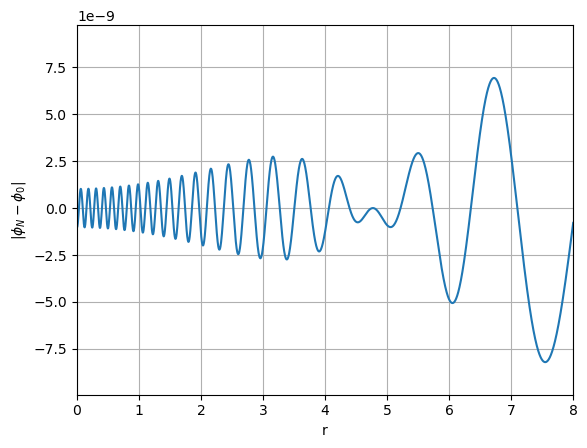

In [13]:
plt.plot(rplot, erro)
plt.xlabel('r')
plt.xlim(0,8)
plt.ylabel("$|\phi_N - \phi_0|$")
plt.grid()
plt.show()

In [14]:
# Initial conditions for Alpha:

alpha0 = 1 - A0*(np.exp(-(r-r0)**2/sigma**2) + np.exp(-(r+r0)**2/sigma**2))

al0 = np.dot(alpha0, inv_psi)

# Initial values of Krr and K: 

# Base functions:

SB1 = 1/2*(SB[1:(N+2),:] + SB[0:(N+1),:])          # VERIFICADO
rSB1 = 1/2*(rSB[1:(N+2),:] + rSB[0:(N+1),:])
rrSB1 = 1/2*(rrSB[1:(N+2),:] + rrSB[0:(N+1),:])

inv_SB1 = np.linalg.inv(SB1)

K0 = A0/20*r **2*(np.exp(-(r)**2/sigma**2) + np.exp(-(r)**2/sigma**2)) 

fk0 = np.dot(K0, inv_SB1)

K = np.dot(fk0, SB1)

Pi_0 = np.zeros(N+1)
b0 = np.dot(Pi_0, psi)
Pi = np.dot(b0, psi)

c0 = np.zeros([N+1])     # guess value
for i in range(N+1):
  c0[i]  =   0.001

N_int = 50

tol = 1e-18    # tolerance

n = 0
nf = 50

# Newton Raphson loop:

while n <= nf:  
  Chi = np.dot(c0, psi)  
  rChi = np.dot(c0 ,rpsi)
  rrChi = np.dot(c0, rrpsi)
  H0 = 4*rChi**2 + 4*rrChi + 8/r*rChi - np.exp(4*Chi)*K**2/4 + 1/2*np.exp(4*Chi)*(Pi**2 + np.exp(-4*Chi)*rPhi**2)
  J1 = rChi*rpsi
  JH = 8*J1 + 4*rrpsi + 8/r*rpsi + 4*psi*np.exp(4*Chi)*K/4 - 2*psi*np.exp(4*Chi)*(Pi**2 + np.exp(-4*Chi)*rPhi**2) + 1/2*np.exp(4*Chi)*(4*psi*np.exp(-4*Chi)*rPhi**2) 
  inv_JH = np.linalg.inv(JH)
  cnew = c0
  c0 = c0 - np.dot(H0, inv_JH)
  err = abs(c0 - cnew)
#  print(max(err))
  if  max(err) <= tol:
    break
  n = n + 1

#out_c = open('c0_30_L02.txt', 'a')
#out_c.write(' ' +' '.join(str('%.18f'%n) for n in c0)+'\n')
#out_c.close()


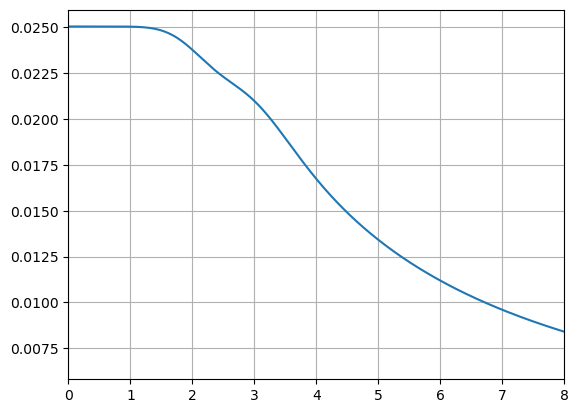

In [15]:

Chiplot = np.dot(c0, psiplot)

rrChiplot = np.dot(c0, rrpsiplot)

plt.plot(rplot,Chiplot)
plt.xlim(0,8)
plt.grid()
plt.show()

Field equations

In [16]:
# Base functions for Beta

SB2 = np.zeros([N+1,N+1])      
rSB2 = np.zeros([N+1,N+1])
rrSB2 = np.zeros([N+1,N+1])

for i in range(N+1):                                                   # VERIFICADO
  SB2[i,] = np.sin((2*(i+1/2)+1)*np.arctan(L0/r))                                                  

for i in range(N+1):
  rSB2[i,] = -np.cos((2*i+2)*np.arctan(L0/r))*(2*i+2)*L0/(r**2*(1+L0**2/r**2))

for i in range(N+1):
  rrSB2[i,] = -np.sin((2*i+2)*np.arctan(L0/r))*(2*i+2)**2*L0**2/(r**4*(1+L0**2/r**2)**2)+2*np.cos((2*i+2)*np.arctan(L0/r))*(2*i+2)*L0/(r**3*(1+L0**2/r**2))-2*np.cos((2*i+2)*np.arctan(L0/r))*(2*i+2)*L0**3/(r**5*(1+L0**2/r**2)**2)

    

Quadrature Integration

In [17]:
Nq = int(3/2*N)           # Quadrature truncation

gauss_quadrature = np.polynomial.legendre.leggauss(Nq + 1)

new_col = gauss_quadrature[0]            # Legendre quadrature points


# Legendre Polinomials

P = np.zeros([Nq+3,Nq+1])
colP = np.zeros([Nq+3,Nq+1])

P[0,] = 1
P[1,] = new_col

colP[0,] = 0
colP[1,] = 1

for i in range(2,Nq+3):
  P[i,] = ((2*i-1)*new_col*P[i-1,] - (i-1)*P[i-2,])/(i)   

for i in range(2,Nq+3):
  colP[i,] = i*P[i-1] + new_col*colP[i-1]

P_max = P[Nq+1]

colP_max = colP[Nq+1]

wq_col = 2/((1-new_col**2)*colP_max**2)    # Legendre weight (Verificado)

rq = L0*(1+new_col)/(1-new_col)            # Physical quadrature domain

qSB = np.zeros([Nq+3,Nq+1])                # Base function in quadrature points
qrSB = np.zeros([Nq+3,Nq+1])
qrrSB = np.zeros([Nq+3,Nq+1])




for i in range(Nq+1+1+1):
  qSB[i,] = np.sin((2*i+1)*np.arctan(L0/rq))                                                  

for i in range(Nq+1+1+1):
  qrSB[i,] = -np.cos((2*i+1)*np.arctan(L0/rq))*(2*i+1)*L0/(rq**2*(1+L0**2/rq**2))

for i in range(Nq+1+1+1):
  qrrSB[i,] = -np.sin((2*i+1)*np.arctan(L0/rq))*(2*i+1)**2*L0**2/(rq**4*(1+L0**2/rq**2)**2)+2*np.cos((2*i+1)*np.arctan(L0/rq))*(2*i+1)*L0/(rq**3*(1+L0**2/rq**2))-2*np.cos((2*i+1)*np.arctan(L0/rq))*(2*i+1)*L0**3/(rq**5*(1+L0**2/rq**2)**2)                                         


qpsi = qSB[0:N+1,:]
rqpsi = qrSB[0:N+1,:]
rrqpsi = qrrSB[0:N+1,:]


# Initial Phi in quadrature points

#qPhi = np.dot(a0, qpsi)      
#rqPhi= np.dot(a0, rqpsi)

# Initial Pi for quadrature points

#qPi = np.dot(b0, qpsi) 


# Initial Chi for quadrature points:

#qChi = np.dot(c0, qpsi)   # Verificado todos
#rqChi = np.dot(c0, rqpsi)
#rrqChi = np.dot(c0, rrqpsi)

# Initial values of Krr:


qSB1 = 1/2*(qSB[1:(N+2),:] + qSB[0:(N+1),:])          # VERIFICADO
rqSB1 = 1/2*(qrSB[1:(N+2),:] + qrSB[0:(N+1),:])
rrqSB1 = 1/2*(qrrSB[1:(N+2),:] + qrrSB[0:(N+1),:])


#qKrr = np.dot(ck0, qSB1) 

# Alpha na origem

psi_0 = np.zeros(N+1)

for i in range(N+1):
  psi_0[i,] = np.sin((2*i+1)*math.pi/2)     # arccot(0) = Pi/2  

#Alpha_0 = 1 + np.dot(al0, psi_0) 

In [18]:
# Filtering

Nc = 0

Nf = N - Nc

coef_f = 36
s = 6

filter1 = np.ones(N+1)
#filter1 = np.exp(- coef_f*((np.arange(N - Nc + 1))/(N-Nc))**s)

In [20]:
# Runge Kutta 4th order

h = 0.00002   # step size
tf = 7

It = int(tf/h)

t = 0

epsilon0 = 0.5
eta0 = 0.3

Madm_error = []
Alpha_origin = []
phi_origin = []
L2HC = []
phi_set = []

out_a = open('Alpha_origin.txt', 'a')
out_a.truncate(0)                        # arase the old datas and start the new ones

out_p = open('phi_origin.txt', 'a')
out_p.truncate(0)

V = 0

M0 = 2*np.dot(np.arange(1, 2*N + 2, 2), c0) # Madm(t = 0)

 
while t <= tf:
 
  # First step
  Phi = np.dot(a0, psi)      
  rPhi = np.dot(a0, rpsi)
  rrPhi = np.dot(a0, rrpsi)

  Pi = np.dot(b0, psi) 
  rPi= np.dot(b0, rpsi)

  Chi = np.dot(c0, psi) 
  rChi = np.dot(c0, rpsi)
  rrChi = np.dot(c0, rrpsi)
    
  Alpha = 1 + np.dot(al0, psi)
  rAlpha = np.dot(al0, rpsi)  
  rrAlpha = np.dot(al0, rrpsi)   

  K = np.dot(fk0, SB1)
  rK = np.dot(fk0, rSB1) 
    
  Matrix_Krr = 2*rChi*SB1  + rSB1  + 3/r*SB1   # (p, p)
  inv_matrix_krr = np.linalg.inv(Matrix_Krr)
  rhsk = (1 + 2*r*rChi)*np.exp(4*Chi)*K/r + np.exp(-6*Chi)*rK - Pi*rPhi*np.exp(4*Chi)  
  ck0 = np.dot(rhsk, inv_matrix_krr)
  Krr = np.dot(ck0, SB1) 
  rKrr = np.dot(ck0, rSB1)

  Matrix_Beta = rSB2 - SB2/r
  inv_matrix_beta = np.linalg.inv(Matrix_Beta)
  rhsbe = 3/2*Alpha*np.exp(-4*Chi)*Krr - 1/2*Alpha*K
  be0 = np.dot(rhsbe , inv_matrix_beta)
  Beta = np.dot(be0, SB2)
  rBeta = np.dot(be0, rSB2)
   
  dal = epsilon0*(rrAlpha + rAlpha*(2/r + 2*rChi))*np.exp(-4*Chi) - epsilon0*Alpha*(1.5*np.exp(-8*Chi)*Krr**2 + 0.5*K**2 - np.exp(-4*Chi)*K*Krr) - epsilon0*Alpha*Pi**2 - epsilon0*Beta*rK - epsilon0*eta0*K
  db = Beta*rPi + np.exp(-4*Chi)*rPhi*(2*Alpha/r + 2*Alpha*rChi) + np.exp(-4*Chi)*(Alpha*rrPhi + rAlpha*rPhi) + Alpha*K*Pi     
  dc = np.dot(1/2*rBeta + Beta*rChi - 1/2*Alpha*np.exp(-4*Chi)*Krr, inv_psi)   
  da = np.dot(Alpha*Pi + Beta*rPhi, inv_psi)  
  dfk = np.dot(-eta0*K, inv_SB1)
  K1 = h*(dc)
  L1 = h*(da)
  N1 = h*(db)
  M1 = h*(dal)
  P1 = h*(dfk)
  
  # L2-error associated to the Hamiltonian constraint
  qPhi = np.dot(a0, qpsi)      
  rqPhi= np.dot(a0, rqpsi)
  qPi = np.dot(b0, qpsi) 
  qChi = np.dot(c0, qpsi)
  rqChi = np.dot(c0, rqpsi)
  rrqChi = np.dot(c0, rrqpsi) 
  qKrr = np.dot(ck0, qSB1)
  qK = np.dot(fk0, qSB1)  
  H = 4*rqChi**2 + 4*rrqChi + 8/rq*rqChi + 3/4*np.exp(-4*qChi)*qKrr**2 - 1/4*np.exp(4*qChi)*qK**2 + 1/2*np.exp(4*qChi)*(qPi**2 + np.exp(-4*qChi)*rqPhi**2) - qK*qKrr/2
  L2 = (1/2*np.dot(H**2,wq_col))**1/2  
  L2HC.append(L2)    # L2 error of HC  
  
  # Alpha origin
  Alpha_0 = np.dot(al0, psi[:,0])
  Alpha_origin.append(Alpha_0)                   # = Alphacenter in matlab
  out_a.write(str(t) + " " + str(Alpha_0))
  out_a.write(',\n')
  
  # Phi origin:  
  phi_0 = np.dot(a0, psi[:,0])
  phi_origin.append(phi_0)
  out_p.write(str(t) + " " + str(phi_0))
  out_p.write(',\n')
    
  # Error ADM mass:
  Madm = 2*np.dot(np.arange(1, 2*N + 2, 2), c0)
  Madm_pc = abs(Madm - M0)/M0 * 100  
  Madm_error.append(Madm_pc)    
    
  # Second step
  Phi = np.dot(a0 + L1/2, psi)     
  rPhi= np.dot(a0 + L1/2 , rpsi)
  rrPhi = np.dot(a0 + L1/2, rrpsi) 
    
  Pi = np.dot(b0 + N1/2, psi)
  rPi= np.dot(b0 + N1/2, rpsi)
  Chi = np.dot(c0 + K1/2, psi)

  rChi = np.dot(c0 + K1/2, rpsi)
  rrChi = np.dot(c0 + K1/2, rrpsi)

  Alpha = 1 + np.dot(al0 + M1/2, psi)
  rAlpha = np.dot(al0 + M1/2, rpsi)  
  rrAlpha = np.dot(al0 + M1/2, rrpsi)     
    
  K = np.dot(fk0 + P1/2, SB1)
  rK = np.dot(fk0 + P1/2, rSB1) 
    
  Matrix_Krr = 2*rChi*SB1 + rSB1 + 3/r*SB1 
  inv_matrix_krr = np.linalg.inv(Matrix_Krr)
  rhsk = - Pi*rPhi*np.exp(4*Chi)
  ck0 = np.dot(rhsk, inv_matrix_krr)
  Krr = np.dot(ck0, SB1) 
  rKrr = np.dot(ck0, rSB1)

  Matrix_Krr = 2*rChi*SB1  + rSB1  + 3/r*SB1   # (p, p)
  inv_matrix_krr = np.linalg.inv(Matrix_Krr)
  rhsk = (1 + 2*r*rChi)*np.exp(4*Chi)*K/r + np.exp(-6*Chi)*rK - Pi*rPhi*np.exp(4*Chi)  
  ck0 = np.dot(rhsk, inv_matrix_krr)
  Krr = np.dot(ck0, SB1) 
  rKrr = np.dot(ck0, rSB1)

  Matrix_Beta = rSB2 - SB2/r
  inv_matrix_beta = np.linalg.inv(Matrix_Beta)
  rhsbe = 3/2*Alpha*np.exp(-4*Chi)*Krr - 1/2*Alpha*K
  be0 = np.dot(rhsbe , inv_matrix_beta)
  Beta = np.dot(be0, SB2)
  rBeta = np.dot(be0, rSB2)
   
  dal = epsilon0*(rrAlpha + rAlpha*(2/r + 2*rChi))*np.exp(-4*Chi) - epsilon0*Alpha*(1.5*np.exp(-8*Chi)*Krr**2 + 0.5*K**2 - np.exp(-4*Chi)*K*Krr) - epsilon0*Alpha*Pi**2 - epsilon0*Beta*rK - epsilon0*eta0*K
  db_int = Beta*rPi + np.exp(-4*Chi)*rPhi*(2*Alpha/r + 2*Alpha*rChi) + np.exp(-4*Chi)*(Alpha*rrPhi + rAlpha*rPhi) + Alpha*K*Pi     
  dc = np.dot(1/2*rBeta + Beta*rChi - 1/2*Alpha*np.exp(-4*Chi)*Krr, inv_psi)   
  da = np.dot(Alpha*Pi + Beta*rPhi, inv_psi)  
  dfk = np.dot(-eta0*K, inv_SB1)
  K2 = h*(dc)
  L2 = h*(da)
  N2 = h*(db)
  M2 = h*(dal)
  P2 = h*(dfk)

  # Third step
  Phi = np.dot(a0 + L2/2, psi)     
  rPhi = np.dot(a0 + L2/2 , rpsi)
  rrPhi = np.dot(a0 + L2/2, rrpsi) 

  Pi = np.dot(b0 + N2/2, psi)
  rPi= np.dot(b0 + N2/2, rpsi)

  Chi = np.dot(c0 + K2/2, psi)
  rChi = np.dot(c0 + K2/2, rpsi)
  rrChi = np.dot(c0 + K2/2, rrpsi)

  Alpha = 1 + np.dot(al0 + M2/2, psi)
  rAlpha = np.dot(al0 + M2/2, rpsi)  
  rrAlpha = np.dot(al0 + M2/2, rrpsi)     
    
  K = np.dot(fk0 + P2/2, SB1)
  rK = np.dot(fk0 + P2/2, rSB1) 
    
  Matrix_Krr = 2*rChi*SB1  + rSB1  + 3/r*SB1   # (p, p)
  inv_matrix_krr = np.linalg.inv(Matrix_Krr)
  rhsk = (1 + 2*r*rChi)*np.exp(4*Chi)*K/r + np.exp(-6*Chi)*rK - Pi*rPhi*np.exp(4*Chi)  
  ck0 = np.dot(rhsk, inv_matrix_krr)
  Krr = np.dot(ck0, SB1) 
  rKrr = np.dot(ck0, rSB1)

  Matrix_Beta = rSB2 - SB2/r
  inv_matrix_beta = np.linalg.inv(Matrix_Beta)
  rhsbe = 3/2*Alpha*np.exp(-4*Chi)*Krr - 1/2*Alpha*K
  be0 = np.dot(rhsbe , inv_matrix_beta)
  Beta = np.dot(be0, SB2)
  rBeta = np.dot(be0, rSB2)
   
  dal = epsilon0*(rrAlpha + rAlpha*(2/r + 2*rChi))*np.exp(-4*Chi) - epsilon0*Alpha*(1.5*np.exp(-8*Chi)*Krr**2 + 0.5*K**2 - np.exp(-4*Chi)*K*Krr) - epsilon0*Alpha*Pi**2 - epsilon0*Beta*rK - epsilon0*eta0*K
  db_int = Beta*rPi + np.exp(-4*Chi)*rPhi*(2*Alpha/r + 2*Alpha*rChi) + np.exp(-4*Chi)*(Alpha*rrPhi + rAlpha*rPhi) + Alpha*K*Pi     
  dc = np.dot(1/2*rBeta + Beta*rChi - 1/2*Alpha*np.exp(-4*Chi)*Krr, inv_psi)   
  da = np.dot(Alpha*Pi + Beta*rPhi, inv_psi)  
  dfk = np.dot(-eta0*K, inv_SB1)
  K3 = h*(dc)
  L3 = h*(da)
  N3 = h*(db)
  M3 = h*(dal)
  P3 = h*(dfk)

  # Forth step
  Phi = np.dot(a0 + L3, psi)     
  rPhi= np.dot(a0 + L3 , rpsi)
  rrPhi = np.dot(a0 + L3, rrpsi) 

  Pi = np.dot(b0 + N3, psi)
  rPi= np.dot(b0 + N3, rpsi)

  Chi = np.dot(c0 + K3, psi)
  rChi = np.dot(c0 + K3, rpsi)
  rrChi = np.dot(c0 + K3, rrpsi)

  Alpha = 1 + np.dot(al0 + M3, psi)
  rAlpha = np.dot(al0 + M3, rpsi)  
  rrAlpha = np.dot(al0 + M3, rrpsi)     
    
  K = np.dot(fk0 + P3, SB1)
  rK = np.dot(fk0 + P3, rSB1) 
    
  Matrix_Krr = 2*rChi*SB1  + rSB1  + 3/r*SB1   # (p, p)
  inv_matrix_krr = np.linalg.inv(Matrix_Krr)
  rhsk = (1 + 2*r*rChi)*np.exp(4*Chi)*K/r + np.exp(-6*Chi)*rK - Pi*rPhi*np.exp(4*Chi)  
  ck0 = np.dot(rhsk, inv_matrix_krr)
  Krr = np.dot(ck0, SB1) 
  rKrr = np.dot(ck0, rSB1)

  Matrix_Beta = rSB2 - SB2/r
  inv_matrix_beta = np.linalg.inv(Matrix_Beta)
  rhsbe = 3/2*Alpha*np.exp(-4*Chi)*Krr - 1/2*Alpha*K
  be0 = np.dot(rhsbe , inv_matrix_beta)
  Beta = np.dot(be0, SB2)
  rBeta = np.dot(be0, rSB2)
   
  dal = epsilon0*(rrAlpha + rAlpha*(2/r + 2*rChi))*np.exp(-4*Chi) - epsilon0*Alpha*(1.5*np.exp(-8*Chi)*Krr**2 + 0.5*K**2 - np.exp(-4*Chi)*K*Krr) - epsilon0*Alpha*Pi**2 - epsilon0*Beta*rK - epsilon0*eta0*K
  db_int = Beta*rPi + np.exp(-4*Chi)*rPhi*(2*Alpha/r + 2*Alpha*rChi) + np.exp(-4*Chi)*(Alpha*rrPhi + rAlpha*rPhi) + Alpha*K*Pi     
  dc = np.dot(1/2*rBeta + Beta*rChi - 1/2*Alpha*np.exp(-4*Chi)*Krr, inv_psi)   
  da = np.dot(Alpha*Pi + Beta*rPhi, inv_psi)  
  dfk = np.dot(-eta0*K, inv_SB1)
  K4 = h*(dc)
  L4 = h*(da)
  N4 = h*(db)
  M4 = h*(dal)
  P4 = h*(dfk)  
  
  t = t + h
    
#  if t > 9:
#    h=0.0001

  print(f't = {t}')
    
  # Evolution functions
  a0 = filter1*(a0 + 1/6 * (L1 + 2*L2 + 2*L3 + L4))
  b0 = filter1*(b0 + 1/6 * (N1 + 2*N2 + 2*N3 + N4))
  c0 = filter1*(c0 + 1/6 * (K1 + 2*K2 + 2*K3 + K4))  
  phi_set.append(np.dot(a0, psiplot))

#  pi_set[i,:] = np.dot(b0, psiplot)
#  chi_set[i,:] = np.dot(c0, psiplot)
#  print(f'a0_max = {max(a0)}, b0_max = {max(b0)}')
  
t1 = np.linspace(0, tf, len(Alpha_origin)) 




NameError: name 'M0' is not defined

In [620]:
max(qPhi)

0.034471851706004246

In [611]:
# Searching for critical amplitude:

#Alpha_origin_disp = Alpha_origin
#Alpha_origin_collapse = Alpha_origin

#plt.plot(t1, Alpha_origin_disp, color = "g", label = "$A_0$ = 0.081")
#plt.plot(t1, Alpha_origin_collapse, color = "y", label = "$A_0$ = {:}".format(A0))
#plt.ylabel(r"$\alpha(t,0)$")
#plt.xlabel("t")
#plt.grid()
#plt.legend()

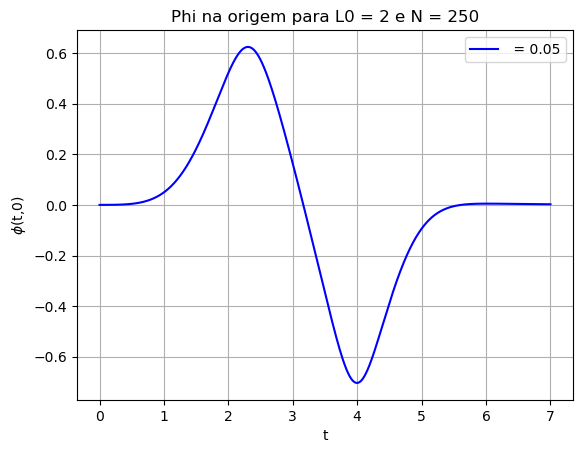

In [612]:
# Phi origin

plt.plot(t1, phi_origin, color = "b", label = " = {:}".format(A0))
plt.title("Phi na origem para L0 = 2 e N = {:}".format(N) )
plt.ylabel("$\phi$(t,0)")
plt.xlabel("t")   
plt.grid()
plt.legend() 

Text(0.5, 1.0, 'log(L2Hc) para $N = 200$, $L_0 = 20$ e $A_0 = $')

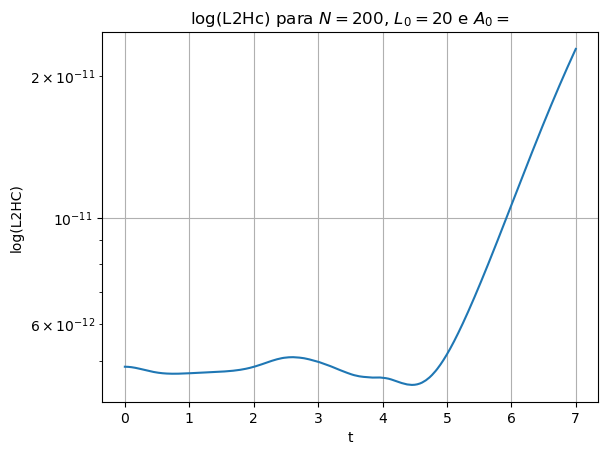

In [613]:
# Erro L2 of Hamiltonian constraint

plt.plot(t1,L2HC)
plt.yscale("log")
plt.ylabel("log(L2HC)")
plt.xlabel("t")
plt.grid()
plt.title("log(L2Hc) para $N = 200$, $L_0 = 20$ e $A_0 = $")

Text(0.5, 1.0, 'log(L2MC) para $N = 50$, $L_0 = 2$')

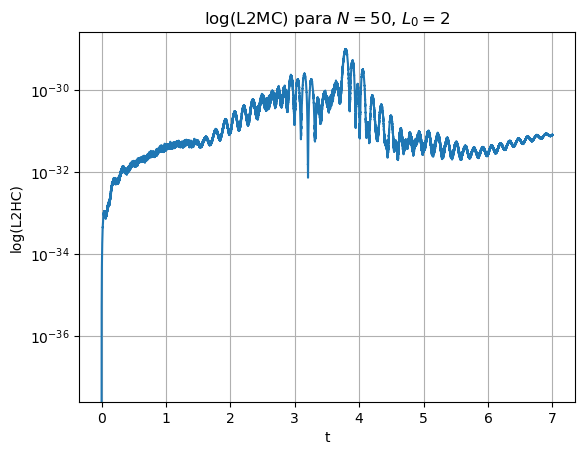

In [614]:
# Erro L2 of momentum constraint

plt.plot(t1,L2MC,label = "$A_0$ = {:}".format(A0))
plt.yscale("log")
plt.ylabel("log(L2HC)")
plt.xlabel("t")
plt.grid()
plt.title("log(L2MC) para $N = 50$, $L_0 = 2$")

In [616]:
#L2HC_50_L02 = max(L2HC)
#L2HC_50_L05 = max(L2HC)
#L2HC_50_L010 = max(L2HC)

#L2HC_100_L02 = max(L2HC)
#L2HC_100_L05 = max(L2HC)
#L2HC_100_L010 = max(L2HC)

#L2HC_150_L02 = max(L2HC)
#L2HC_150_L05 = max(L2HC)
#L2HC_150_L010 = max(L2HC)

#L2HC_200_L02 = max(L2HC)
#L2HC_200_L05 = max(L2HC)
#L2HC_200_L010 = max(L2HC)

#L2HC_250_L02 = max(L2HC)
#L2HC_250_L05 = max(L2HC)
L2HC_250_L010 = max(L2HC)

#L2HC_300_L02 = max(L2MC)
#L2HC_300_L05 = max(L2MC)
#L2HC_300_L010 = max(L2MC)

In [617]:
print('L2HC_50_L02 =',L2HC_50_L02,'L2HC_50_L05 =', L2HC_50_L05, 'L2HC_50_L010 =',L2HC_50_L010,'L2HC_100_L02 =',L2HC_100_L02,'L2HC_100_L05 =', L2HC_100_L05, 'L2HC_100_L010 =',L2HC_100_L010,'L2HC_150_L02 =',L2HC_150_L02,'L2HC_150_L05 =', L2HC_150_L05, 'L2HC_150_L010 =',L2HC_150_L010,'L2HC_200_L02 =',L2HC_200_L02,'L2HC_200_L05 =', L2HC_200_L05, 'L2HC_200_L010 =',L2HC_200_L010, 'L2HC_250_L02 =',L2HC_250_L02,'L2HC_250_L05 =', L2HC_250_L05, 'L2HC_250_L010 =',L2HC_250_L010, sep = '\n')

L2HC_50_L02 =
0.01816391546619686
L2HC_50_L05 =
0.0002546176908516956
L2HC_50_L010 =
0.002733059112102552
L2HC_100_L02 =
0.0027662912019201643
L2HC_100_L05 =
1.3791713620705118e-06
L2HC_100_L010 =
1.4069193497023997e-05
L2HC_150_L02 =
0.0004488248226698636
L2HC_150_L05 =
9.503741887713358e-09
L2HC_150_L010 =
3.058868117659927e-08
L2HC_200_L02 =
1.8196716483457423e-05
L2HC_200_L05 =
4.542907764384823e-09
L2HC_200_L010 =
3.349944877536477e-11
L2HC_250_L02 =
8.89094083876591e-07
L2HC_250_L05 =
2.6213587923518953e-09
L2HC_250_L010 =
2.2760809719282817e-11


In [184]:
# Code convergency for momentum contraint:

#L2MC_50_L02 = max(L2MC)
#L2MC_50_L05 = max(L2MC)
#L2MC_50_L010 = max(L2MC)

#L2MC_100_L02 = max(L2MC)
#L2MC_100_L05 = max(L2MC)
#L2MC_100_L010 = max(L2MC)

#L2MC_150_L02 = max(L2MC)
#L2MC_150_L05 = max(L2MC)
#L2MC_150_L010 = max(L2MC)

#L2MC_200_L02 = max(L2MC)
#L2MC_200_L05 = max(L2MC)
#L2MC_200_L010 = max(L2MC)

#L2MC_250_L02 = max(L2MC)
#L2MC_250_L05 = max(L2MC)
#L2MC_250_L010 = max(L2MC)

#L2MC_300_L02 = max(L2MC)
#L2MC_300_L05 = max(L2MC)
#L2MC_300_L010 = max(L2MC)

In [185]:
print('L2MC_50_L02 =',L2MC_50_L02,'L2MC_50_L05 =', L2MC_50_L05, 'L2MC_50_L010 =',L2MC_50_L010,'L2MC_100_L02 =',L2MC_100_L02,'L2MC_100_L05 =', L2MC_100_L05, 'L2MC_100_L010 =',L2MC_100_L010,'L2MC_150_L02 =',L2MC_150_L02,'L2MC_150_L05 =', L2MC_150_L05, 'L2MC_150_L010 =',L2MC_150_L010,'L2MC_200_L02 =',L2MC_200_L02,'L2MC_200_L05 =', L2MC_200_L05, 'L2MC_200_L010 =',L2MC_200_L010, 'L2MC_250_L02 =',L2MC_250_L02,'L2MC_250_L05 =', L2MC_250_L05, 'L2MC_250_L010 =',L2MC_250_L010, sep = '\n')

NameError: name 'L2MC_100_L05' is not defined

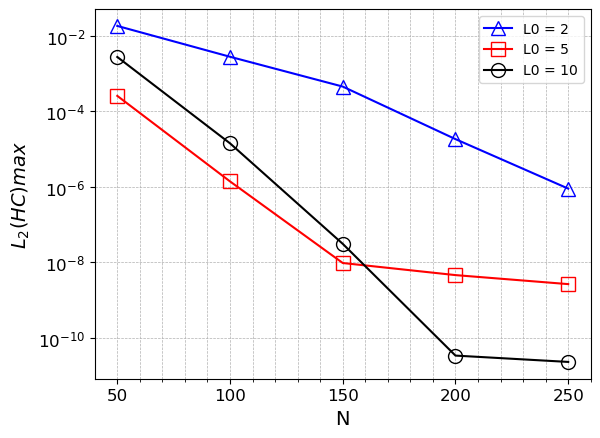

In [633]:


L2HC_50_L02 =0.01816391546619686
L2HC_50_L05 =0.0002546176908516956
L2HC_50_L010 =0.002733059112102552
L2HC_100_L02 =0.0027662912019201643
L2HC_100_L05 =1.3791713620705118e-06
L2HC_100_L010 =1.4069193497023997e-05
L2HC_150_L02 =0.0004488248226698636
L2HC_150_L05 =9.503741887713358e-09
L2HC_150_L010 =3.058868117659927e-08
L2HC_200_L02 =1.8196716483457423e-05
L2HC_200_L05 =4.542907764384823e-09
L2HC_200_L010 =3.349944877536477e-11
L2HC_250_L02 =8.89094083876591e-07
L2HC_250_L05 =2.6213587923518953e-09
L2HC_250_L010 =2.2760809719282817e-11

L2HC_L02 = [L2HC_50_L02, L2HC_100_L02, L2HC_150_L02, L2HC_200_L02, L2HC_250_L02]

L2HC_L05 = [L2HC_50_L05, L2HC_100_L05, L2HC_150_L05, L2HC_200_L05, L2HC_250_L05]

L2HC_L010 = [L2HC_50_L010, L2HC_100_L010, L2HC_150_L010, L2HC_200_L010, L2HC_250_L010]

Ns = [50,100,150,200,250]

plt.plot(Ns, L2HC_L02, '-b^', label = "L0 = 2", markersize = 10, markerfacecolor='none')
plt.plot(Ns, L2HC_L05, '-rs',label = "L0 = 5", markersize = 10, markerfacecolor='none')
plt.plot(Ns, L2HC_L010, '-ko',label = "L0 = 10", markersize = 10, markerfacecolor='none')
plt.xticks(Ns)
plt.tick_params(axis='both', which='both', labelsize=12)  # Ajusta o tamanho dos ticks em ambos os eixos
plt.xlabel('N', fontsize = 14)
plt.ylabel('$L_2(HC)max$', fontsize = 14)
plt.yscale('log')
plt.grid(which='both', linestyle='--', linewidth=0.5)  # Grades principais
plt.minorticks_on()  # Ativa grades menores
plt.legend()
plt.show()

In [ ]:
# Plot 3D from scalar field at t = constant:

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12,6))
#ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122,projection='3d')

y = phi_set[] # 5 plots from t = 0, .., 10
x = rplot
theta = np.linspace(0, 2*np.pi, M)    # Revolution of f(phi,r)

xn = np.outer(x, np.cos(theta))
yn = np.outer(x, np.sin(theta))
zn = np.zeros_like(xn)

for i in range(len(x)):
    zn[i,:] = np.full_like(zn[0,:], y[i])


ax2.plot_surface(xn, yn, zn)

     
#ax1.plot(x, y)
#surf = ax2.plot_surface(xn, yn, zn, rstride = 1, cmap = 'viridis', edgecolor = 'none')
#fig.colorbar(surf, ax = ax2, shrink = 0.5, aspect = 5)  # adiciona barra de cores para a superfície 3D
#ax1.view_init(elev = 30, azim = 30)  # ajusta a perspectiva
#ax2.view_init(elev = 30, azim = 30)
#ax2.grid(False)
#plt.axis('off')
plt.show()

In [ ]:
phi_set[49999]

In [ ]:
# Animation plot for Phi: Scalar Field
        
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
import matplotlib as mpl
%matplotlib inline
mpl.style.use('ggplot')

fig = plt.figure()
ax = plt.axes(xlim=(0, 10),ylim = (-2, 1.5))
line, = ax.plot([], [], lw=2)
initA0_text = ax.text(0.02, 0.95, '', transform=ax.transAxes)
time_text = ax.text(0.02, 0.9, '', transform=ax.transAxes)
x = rplot

def init():
    line.set_data([], [])
    initA0_text.set_text('')
    time_text.set_text('')
    return line,

def animate(i):
  y = phi_set[i]
  line.set_data(x, y)
  initA0_text.set_text("$A_0 = {:}$".format(A0))
  time_text.set_text("Time ="+str(round(h+h*i,2)))
  return line,

anim = FuncAnimation(fig, animate, init_func=init,
                               frames=It, interval=0.2, blit=True)

#HTML(anim.to_html5_video())
if A0 > 0.0819:
    anim.save("animation_colapse.mp4")
else:
    anim.save("animation_dispersion.mp4")
    
        